In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
path = Path("./Resources/lending_data.csv")
lending_data_df = pd.read_csv(path)

# Review the DataFrame
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df['loan_status']

# Separate the X variable, the features
x = lending_data_df.drop(columns="loan_status")

In [4]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
x[:5]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=1,
                                                    stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
# Fit the model using training data
classifier.fit(x_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
prediction = classifier.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, prediction)

array([[18679,    80],
       [   67,   558]], dtype=int64)

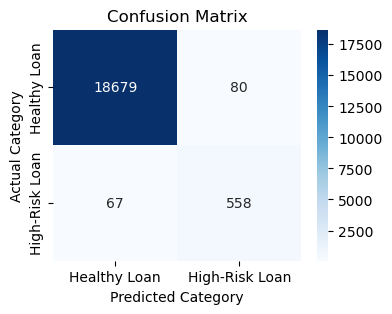

In [12]:
# Confusion matrix data
conf_matrix_data = np.array([[18679, 80], [67, 558]])

# Labels for the classes
class_labels = ['Healthy Loan', 'High-Risk Loan']

# Creating the confusion matrix plot
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_data, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()

In [13]:
# Print the classification report for the model
target_names = ["(0) healthy loan", "(1) high-risk loan"]
print(classification_report(y_test, prediction, target_names=target_names))

                    precision    recall  f1-score   support

  (0) healthy loan       1.00      1.00      1.00     18759
(1) high-risk loan       0.87      0.89      0.88       625

          accuracy                           0.99     19384
         macro avg       0.94      0.94      0.94     19384
      weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The accuracy overall is 99%. The model's prediction skills are rather balanced and accurate. However, it performs somewhat better in detecting healthy loans (F1 score of 1.00) than high-risk loans(F1 score of 0.88). 

---